## Different imports and setup

In [19]:
# Standard import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
# Machine learning libraries
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

from tqdm.keras import TqdmCallback

In [20]:
# Custom plots file and tensorflow models
from Tools import Plot
from Tools import Custom_models
from Tools import Helpers

In [4]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('Not working on GPU !')
else:
  print('Found GPU at: {}'.format(device_name))

Not working on GPU !


In [5]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## Set the seeds and extract the training data

In [6]:
# Set the seed for reproducibility
seed = 6
np.random.seed(seed)
tf.random.set_seed(seed*2)

In [7]:
# Load the data
features_training, labels_training, features_testing, labels_testing = Helpers.Load_and_split_1D('Data/tanh.txt',
                                                                                                 seed, ratio=0.9)

In [8]:
print(f'We will be training on {len(features_training)} examples !')
print(f'And testing on {len(features_testing)} examples !')

We will be training on 90000 examples !
And testing on 10000 examples !


## Create and train the model

In [9]:
# Create the model
learning_rate = 1e-2
batch = 32
K = 100
K_out = 1
ker = 3
name = 'Dense_2_layer_1stlayer_non_trainable'

opt = Adam(learning_rate=learning_rate)

model = Custom_models.Model_1D_2_layers_trainable(K1=K, K_output=K_out, train_first_layer=False, name=name)
model.compile(loss=MeanSquaredError(), optimizer=opt)

In [10]:
# Train
N_epochs = 200

history = model.fit(features_training, labels_training, epochs=N_epochs, validation_split=0.1,
 batch_size=batch, validation_batch_size=batch, verbose=0, shuffle=True, initial_epoch=0,
  callbacks=[TqdmCallback()])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2021-10-20 17:30:53.358295: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-20 17:30:53.360923: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


## Check the efficiency of training

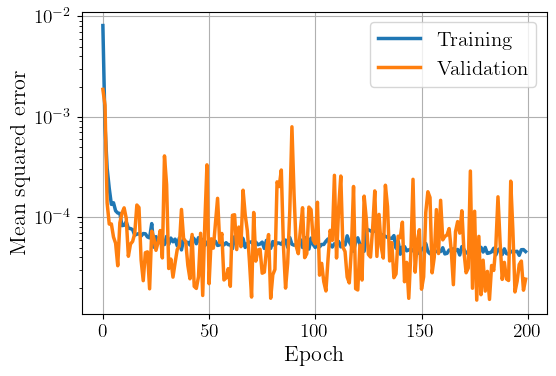

In [11]:
filename = 'Figures/1D_conv_1stlayer_non_trainable.pdf'
save = False

plt.figure()
plt.semilogy(history.epoch, np.array(history.history['loss']), label='Training')
plt.semilogy(history.epoch, np.array(history.history['val_loss']), label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Mean squared error')
plt.legend()
plt.grid()
if (save):
    plt.savefig(filename, bbox_inches='tight')
plt.show()

## Save the model

In [12]:
# Save the model
model_name = 'Saved_models/Dense_2_layer_1stlayer_non_trainable'
save_model = False

if (save_model):
    model.save(model_name)

INFO:tensorflow:Assets written to: Saved_models/Dense_2_layer_1stlayer_non_trainable/assets


2021-10-20 17:35:27.907345: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


## Check the results on the testing set

In [13]:
sorting = np.argsort(features_testing)
features_testing = features_testing[sorting]
labels_testing = labels_testing[sorting]

prediction = model.predict(features_testing)
prediction = np.ravel(prediction)


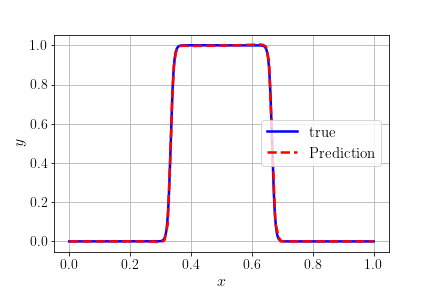

In [21]:
plt.figure()
plt.plot(features_testing, labels_testing, 'b-', label='true')
plt.plot(features_testing, prediction, 'r--', label='Prediction')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()